Here we are going to study the pokemon dataset

This dataset is full of fun and interesting 

We can apply any ML model on this one

Note: Dataset is taken from Kaggle

In [1]:
# Importing the Base Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# loading the Data
data = pd.read_csv("C:\\Users\\user\\Desktop\\Desk-8-8-19\\Datasets\\Pokemon.csv")

In [4]:
data.shape

(800, 13)

In [5]:
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


# EDA

In [6]:
# Droping Unnecessary columns

del data['#']

In [7]:
data['Type 2'].unique()

array(['Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

In [8]:
# Checking Missing Values

data.isnull().sum()

Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [6]:
# Fill Missing Values

# Here we are going to replace missing values with type1 value

data['Type 2'].fillna(data['Type 1'],inplace=True)

In [7]:
data.isnull().sum()

#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [11]:
data.dtypes

Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [12]:
data['Type 2'].value_counts()

Flying      99
Water       73
Psychic     71
Normal      65
Grass       58
Poison      49
Ground      48
Fighting    46
Fire        40
Fairy       38
Electric    33
Dark        30
Dragon      29
Steel       27
Ice         27
Ghost       24
Rock        23
Bug         20
Name: Type 2, dtype: int64

# Visualizations

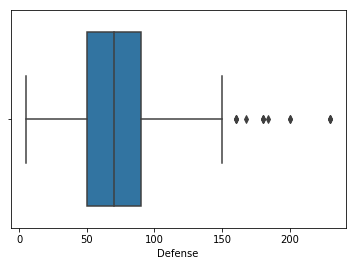

In [15]:
sns.boxplot(data.Defense)

In [21]:
def comp_pok(name1,name2,param):
    a = data[(data.Name == name1) | (data.Name ==name2)]
    sns.factorplot(x='Name',y=param,data=a,kind='bar',size=5,aspect=1,palette=['#0000ff','#FFB6C1'])

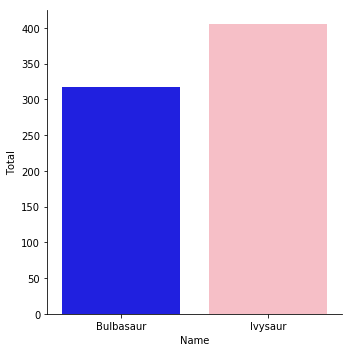

In [22]:
comp_pok('Bulbasaur','Ivysaur','Total')

# Data Preprocessing

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [ ]:
scaler.fit_transform(data)

# Input & Output

In [8]:
# Here We are taking legendary column as output which is a class variable and applying classification algorithms

X = data[['HP','Attack','Defense','Speed','Generation','Sp. Atk','Sp. Def']]
y = data['Legendary']

In [9]:
y.unique

<bound method Series.unique of 0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
770    False
771    False
772    False
773    False
774    False
775    False
776    False
777    False
778    False
779    False
780    False
781    False
782    False
783    False
784    False
785    False
786    False
787    False
788    False
789    False
790    False
791    False
792     True
793     True
794     True
795     True
796     True
797     True
798     True
799     True
Name: Legendary, Length: 800, dtype: bool>

In [10]:
X.head()

,HP,Attack,Defense,Speed,Generation,Sp. Atk,Sp. Def
0,45,49,49,45,1,65,65
1,60,62,63,60,1,80,80
2,80,82,83,80,1,100,100
3,80,100,123,80,1,122,120
4,39,52,43,65,1,60,50


In [11]:
y.head()

0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

# Train & Test Split

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=123)

In [16]:
y_train.head()

397    False
514    False
687    False
230    False
232    False
Name: Legendary, dtype: bool

# Modelling

In [17]:
# Loading Models for Class Prediction

from sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.svm import SVC # "Support Vector Classifier"
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.cluster import KMeans

In [18]:
# Building Models

clf = RandomForestClassifier(n_estimators=100)
svmclassifier = SVC(kernel='linear')
#regressor = LinearRegression()
logisticregressionclassifier= LogisticRegression(random_state=0)
decisionTreeClassifier = DecisionTreeClassifier(random_state=0)
naivebayesclassifier = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=5)
#kmeans = KMeans(n_clusters=3)

# Fitting

In [19]:
#regressor.fit(X_train,y_train)
clf.fit(X_train,y_train)
svmclassifier.fit(X_train,y_train)
logisticregressionclassifier.fit(X_train,y_train)
decisionTreeClassifier.fit(X_train,y_train)
naivebayesclassifier.fit(X_train,y_train)
knn.fit(X_train, y_train)
#outoutput = kmeans.fit(X_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

# Predictions

In [20]:
y_pred = clf.predict(X_test)
y_pred1 = svmclassifier.predict(X_test)
y_pred2 = logisticregressionclassifier.predict(X_test)
y_pred3 = naivebayesclassifier.predict(X_test)
y_pred4 = knn.predict(X_test)
y_pred5 = decisionTreeClassifier.predict(X_test)

In [21]:
# Importing Confusion Matrix & Accuracy score Metrics for Classification

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

Confusion Matrix for Clf

In [22]:
cm = confusion_matrix(y_pred,y_test)

In [23]:
cm

array([[111,   4],
       [  0,   5]], dtype=int64)

# Accuracy Scores

In [25]:
print("Accuracy Score of RandomForestClassifier : ",accuracy_score(y_pred,y_test))
print("Accuracy Score of SvmClassifier : ",accuracy_score(y_pred1,y_test))
print("Accuracy Score of LogisticClassifier : ",accuracy_score(y_pred2,y_test))
print("Accuracy Score of NaiveBayesClassifier : ",accuracy_score(y_pred3,y_test))
print("Accuracy Score of KnnClassifier : ",accuracy_score(y_pred4,y_test))
print("Accuracy Score of DecisionTreeClassifier : ",accuracy_score(y_pred5,y_test))

Accuracy Score of RandomForestClassifier :  0.9666666666666667
Accuracy Score of SvmClassifier :  0.9416666666666667
Accuracy Score of LogisticClassifier :  0.925
Accuracy Score of NaiveBayesClassifier :  0.925
Accuracy Score of KnnClassifier :  0.9333333333333333
Accuracy Score of DecisionTreeClassifier :  0.9416666666666667


Checking all accuracy scores of the above classifiers ...Random Forest Classifier is giving Best Accuracy score with 96.6%

Whic is a pretty good score ...

We can try Multiple Techniques on this not only classification.....